# ECG and PPG Signals

This notebook shows a few ECG and PPG signals recorded during different cardiac rhythms.

First, we import the required packages and define global constants.

In [1]:
%matplotlib widget


import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np


DATA_FILE = pathlib.Path("../data/ecg_ppg_data.pkl")

Then, we load the signals.

In [2]:
def load_signals():
    with open(DATA_FILE, mode="rb") as f:
        return pickle.load(f)


signals = load_signals()

print(f"Number of signals: {len(signals)}")

Number of signals: 8


Finally, we create a figure for each cardiac rhythm showing the ECG and PPG signals and the corresponding interbeat intervals.

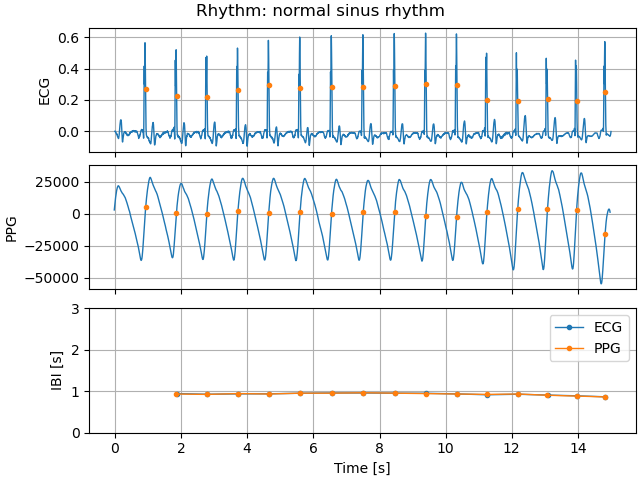

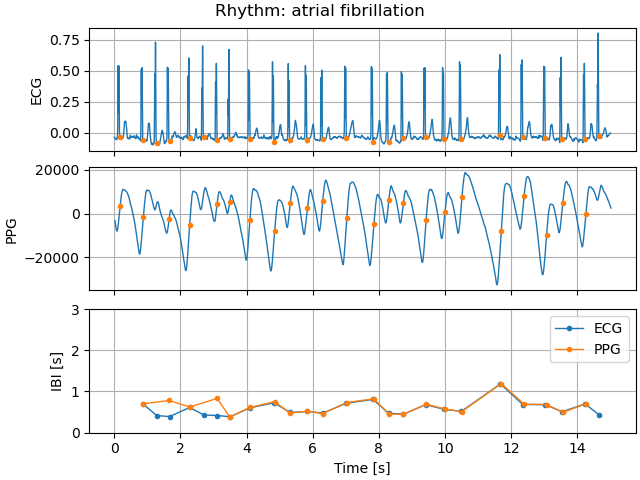

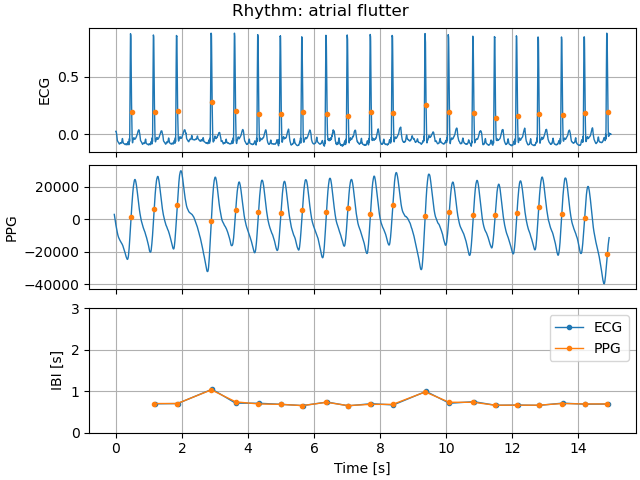

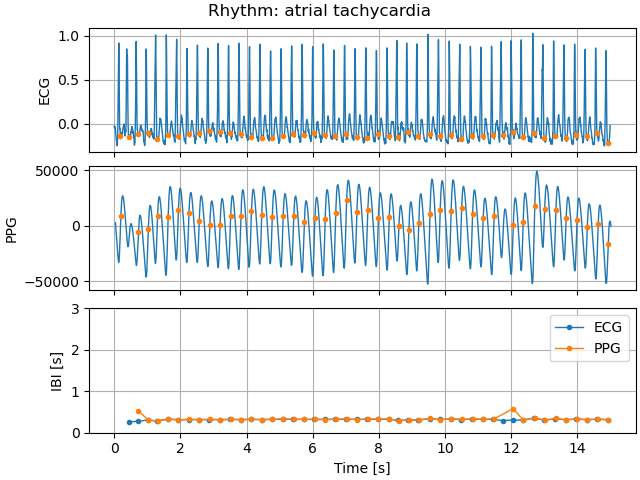

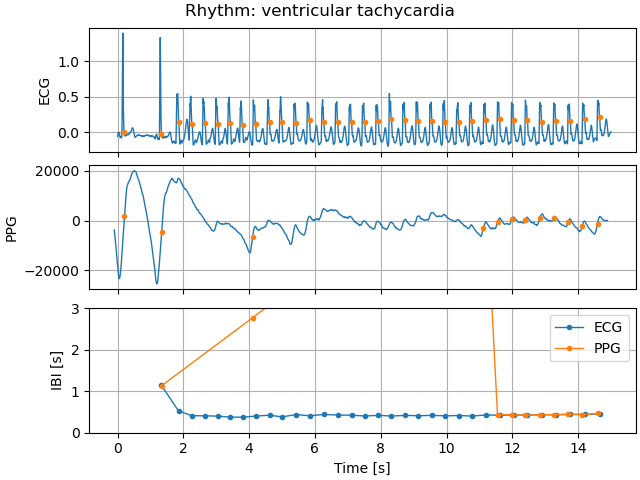

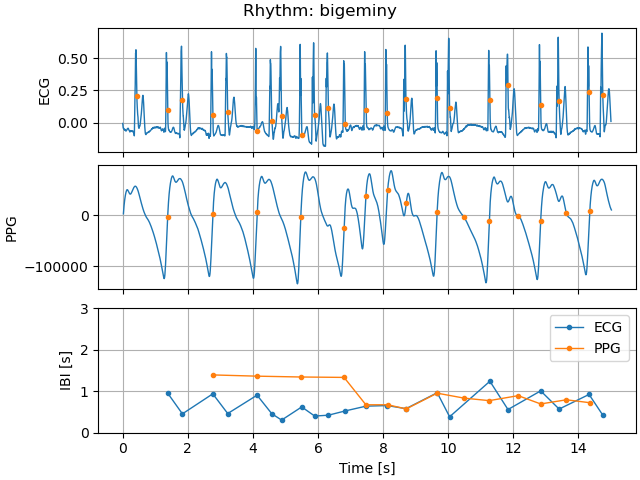

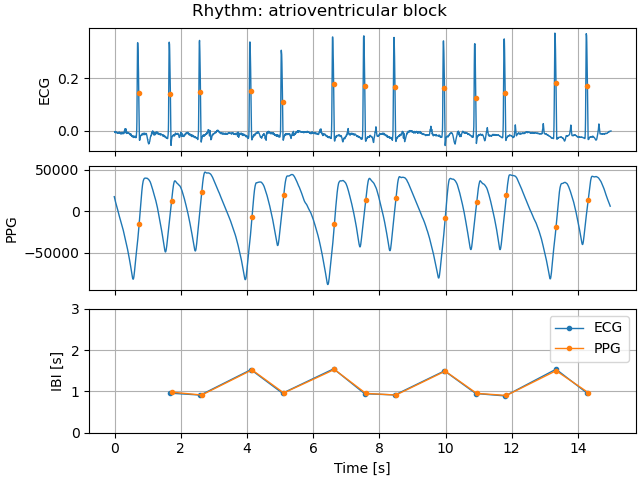

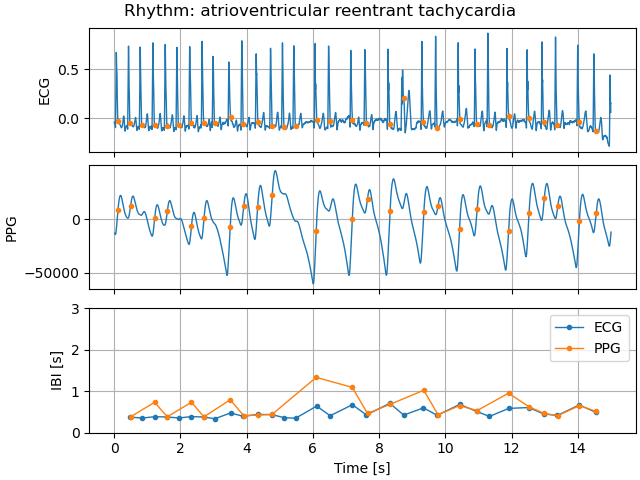

In [3]:
def plot_signal(signal):
    fig, axes = plt.subplots(3, 1, sharex="all", constrained_layout=True)
    fig.suptitle(f"Rhythm: {signal['rhythm']}")

    def plot_ecg(ax):
        t = signal["ecg"]["time"]
        x = signal["ecg"]["signal"]
        beats = signal["ecg"]["beats"]
        ax.plot(t, x, linewidth=1)
        ax.plot(beats, np.interp(beats, t, x), ".")
        ax.grid()
        ax.set_ylabel("ECG")

    def plot_ppg(ax):
        t = signal["ppg"]["time"]
        x = signal["ppg"]["signal"]
        beats = signal["ppg"]["beats"]
        ax.plot(t, x, linewidth=1)
        ax.plot(beats, np.interp(beats, t, x), ".")
        ax.grid()
        ax.set_ylabel("PPG")

    def plot_ibi(ax):
        ecg_beats = signal["ecg"]["beats"]
        ppg_beats = signal["ppg"]["beats"]
        ax.plot(ecg_beats[1:], np.diff(ecg_beats), ".-", linewidth=1, label="ECG")
        ax.plot(ppg_beats[1:], np.diff(ppg_beats), ".-", linewidth=1, label="PPG")
        ax.grid()
        ax.set_ylim(0.0, 3.0)
        ax.set_ylabel("IBI [s]")
        ax.legend(loc="upper right")

    plot_ecg(axes.flat[0])
    plot_ppg(axes.flat[1])
    plot_ibi(axes.flat[2])
    axes.flat[-1].set_xlabel("Time [s]")


for signal in signals:
    plot_signal(signal)

## Question 1

What are the main differences between the ECG and PPG signals for the different rhythms? In particular, which signal is the best (ECG or PPG) to detect cardiac beats? Can you think of a few reasons explaining why one signal is better than the other?